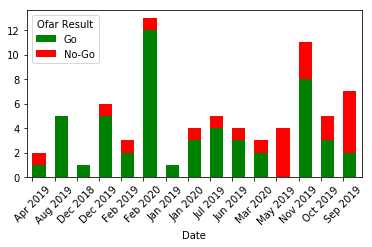

In [58]:
import pandas as pd
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
df = pd.read_excel('mapletree testing efficiency.xlsx',index=False)

# SELECT ONLY THE TWO COLUMNS WE WANT
df = df[['Lift Handover Date','Ofar result']]
df.dropna(inplace=True)

# CONVERT STRINGS IN LIFT HANDOVER DATE COLUMN TO DATETIME
df['Lift Handover Date'] = pd.to_datetime(df['Lift Handover Date'])

# EXTRACT YEAR AND MONTH OF LIFT HANDOVER DATE COLUMN INTO 2 SEPARATE COLUMNS
df['year'], df['month'] = df['Lift Handover Date'].dt.year, df['Lift Handover Date'].dt.month

# CLEAN UP DATA
df['Ofar Result'] = df['Ofar result'].map({'GO': 'Go', 'No-go': 'No-Go'})
df['month'] = df['month'].map({1:'Jan',
                               2:'Feb',
                               3:'Mar',
                               4:'Apr',
                               5:'May',
                               6:'Jun',
                               7:'Jul',
                               8:'Aug',
                               9:'Sep',
                               10:'Oct',
                               11:'Nov',
                               12:'Dec',
                              })


# SORT DATA AND COUNT FREQUENCY IN EACH OF THE 2 COLUMNS
df['MonthYear'] = df['month'] + ' ' + df['year'].astype(str) 
df2 = df.groupby(['MonthYear','Ofar Result'])['MonthYear'].count().unstack('Ofar Result').fillna(0)

df2[['Go','No-Go']].plot(kind='bar', stacked=True, width = 0.6, align = 'edge', color = ['g','r'])
labels = list(df.groupby(['MonthYear','Ofar Result']))

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.gcf().subplots_adjust(bottom=0.30)
plt.savefig('Mapletree efficiency bar chart.png',dpi=1000) 
plt.show()


In [28]:
df

,Lift Handover Date,Ofar result,year,month,Ofar result cleaned,"year,month"
0,2018-12-28,GO,2018,12,T,2030
1,2019-01-15,GO,2019,1,T,2020
2,2019-02-19,GO,2019,2,T,2021
3,2019-02-28,No-go,2019,2,F,2021
4,2019-02-28,GO,2019,2,T,2021
5,2019-04-30,GO,2019,4,T,2023
6,2019-04-30,No-go,2019,4,F,2023
7,2019-05-14,No-go,2019,5,F,2024
8,2019-05-17,No-go,2019,5,F,2024
9,2019-05-17,No-go,2019,5,F,2024
